In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd


from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

In [2]:
# days = range(1,32)
day = 25

month = '03'

#load the dataset
data = np.load('S-cnorm/s-od-odm-2020-' + month + '-' + str(day) + '-cnorm.npy')

np.fill_diagonal(data, 0)

In [3]:
data

array([[0.00000000e+00, 3.30080367e-02, 1.41263490e-02, ...,
        6.50592690e-05, 0.00000000e+00, 4.18988562e-05],
       [3.95245171e-02, 0.00000000e+00, 7.57245059e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.63447251e-02, 6.36481056e-02, 0.00000000e+00, ...,
        1.30118538e-05, 0.00000000e+00, 4.18988562e-05],
       ...,
       [0.00000000e+00, 7.17566016e-05, 3.63768643e-04, ...,
        0.00000000e+00, 1.27985222e-02, 9.76243349e-03],
       [0.00000000e+00, 0.00000000e+00, 6.06281072e-05, ...,
        1.39226836e-03, 0.00000000e+00, 1.08937026e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.08572209e-03, 3.03470115e-03, 0.00000000e+00]])

In [4]:
edges = []
weight = []

total = data.shape[0]
for i in range(total):
    for j in range(i,total):
        if i==j:
            continue
        greater = max(data[i,j], data[j,i])
        edges.append((i,j))
        weight.append(greater)
        
        

In [5]:
weights = pd.DataFrame(list(zip(edges,weight)), columns = ['edge', 'weight'])
weights

,edge,weight
0,"(0, 1)",0.039525
1,"(0, 2)",0.016345
2,"(0, 3)",0.017311
3,"(0, 4)",0.005126
4,"(0, 5)",0.067088
...,...,...
183916,"(603, 605)",0.020979
183917,"(603, 606)",0.011717
183918,"(604, 605)",0.012799
183919,"(604, 606)",0.009762


In [6]:
weights.sort_values(by='weight', ascending=False)

,edge,weight
81996,"(155, 157)",0.327200
177718,"(495, 509)",0.307692
175796,"(479, 483)",0.256637
181643,"(539, 540)",0.256198
13102,"(22, 24)",0.252427
...,...,...
79393,"(149, 275)",0.000000
79392,"(149, 274)",0.000000
79391,"(149, 273)",0.000000
79390,"(149, 272)",0.000000


In [7]:
sorted_weights = weights.sort_values(by='weight', ascending=False)

In [8]:
def agglomerative_network(data, num_nodes):
    n=num_nodes
    
    is_clustered = dict(zip(range(n), np.zeros(n, dtype=int)))
    df_cluster = pd.DataFrame.from_dict(is_clustered, orient='index', columns=['cluster'])
    
    linkage = []
    
    cluster_level = 1
    
    for i, row in data.iterrows():
        b1, b2 = row['edge']
#         print(b1,b2)

        if not is_clustered[b1] and not is_clustered[b2]:
            level = 0
            is_clustered[b1] = 1
            is_clustered[b2] = 1
            
            group_id = len(linkage)+n
            df_cluster.iloc[[b1,b2]] = group_id
            z_i = [b1, b2, cluster_level, 2]
            df_cluster[cluster_level] = df_cluster['cluster']
            cluster_level +=1
#             print(z_i)
            linkage.append(z_i)
#             print(df_cluster)
        else:
            if not is_clustered[b1]:
#                 print("Finding distance from ", b1)

                clus_num = df_cluster['cluster'].iloc[b2]
#                 print(clus_num)

                cluster = df_cluster[df_cluster['cluster']==clus_num]
                cluster_count = len(cluster)+1
#                 print(cluster.index)
                
                group_id = clus_num

                z_i = [b1, group_id, cluster_level, cluster_count]
#                 print("Left", z_i)
#                 print(len(linkage))
                updated_group_id = len(linkage)+n


                df_cluster['cluster'].iloc[cluster.index] = updated_group_id
                df_cluster['cluster'].iloc[b1] = updated_group_id
#                 print(df_cluster)
                df_cluster[cluster_level] = df_cluster['cluster']
                linkage.append(z_i)
                cluster_level += 1
                is_clustered[b1] = 1
                
                
            elif not is_clustered[b2]:
#                 print("Finding distance from", b1, b2)

                clus_num = df_cluster['cluster'].iloc[b1]
#                 print(clus_num)

                cluster = df_cluster[df_cluster['cluster']==clus_num]
                cluster_count = len(cluster)+1
#                 print(cluster.index)
                group_id = clus_num

                z_i = [b2, group_id, cluster_level, cluster_count]
#                 print("Right", z_i)
                
                updated_group_id = len(linkage)+n


                df_cluster['cluster'].iloc[cluster.index] = updated_group_id
                df_cluster['cluster'].iloc[b2] = updated_group_id
#                 print(df_cluster)

                linkage.append(z_i)
                df_cluster[cluster_level] = df_cluster['cluster']
                cluster_level += 1
                is_clustered[b2] = 1
            else:
                clus_num1 = df_cluster['cluster'].iloc[b1]
                clus_num2 = df_cluster['cluster'].iloc[b2]
#                 print("merging", clus_num1, clus_num2)
                if clus_num1 != clus_num2:
                    cluster1 = df_cluster[df_cluster['cluster']==clus_num1]
                    cluster2 = df_cluster[df_cluster['cluster']==clus_num2]
                    
                    cluster_count = len(cluster1)+len(cluster2)
#                     print(df_cluster)
#                     if clus_num1 < n:
#                         group_id = len(linkage)+n-1
#                     else:
#                         group_id = clus_num1
                    z_i = [clus_num2, clus_num1, cluster_level, cluster_count]
                    linkage.append(z_i)
                    
                    updated_group_id = len(linkage)+n-1
#                     print(updated_group_id)
                    df_cluster['cluster'].iloc[cluster1.index] = updated_group_id
                    df_cluster['cluster'].iloc[cluster2.index] = updated_group_id
                    df_cluster[cluster_level] = df_cluster['cluster']
                    cluster_level+=1
                else:
                    pass
                
#     print(df_cluster)
                
    return np.array(linkage, dtype=float), df_cluster

In [9]:
z, df = agglomerative_network(sorted_weights, total)

In [11]:
df.to_csv('march25-od-cluster-levels.csv')

In [48]:
z

array([[1.550e+02, 1.570e+02, 1.000e-01, 2.000e+00],
       [4.950e+02, 5.090e+02, 2.000e-01, 2.000e+00],
       [4.790e+02, 4.830e+02, 3.000e-01, 2.000e+00],
       ...,
       [4.190e+02, 1.209e+03, 6.040e+01, 6.050e+02],
       [8.900e+01, 1.210e+03, 6.050e+01, 6.060e+02],
       [8.600e+01, 1.211e+03, 6.060e+01, 6.070e+02]])

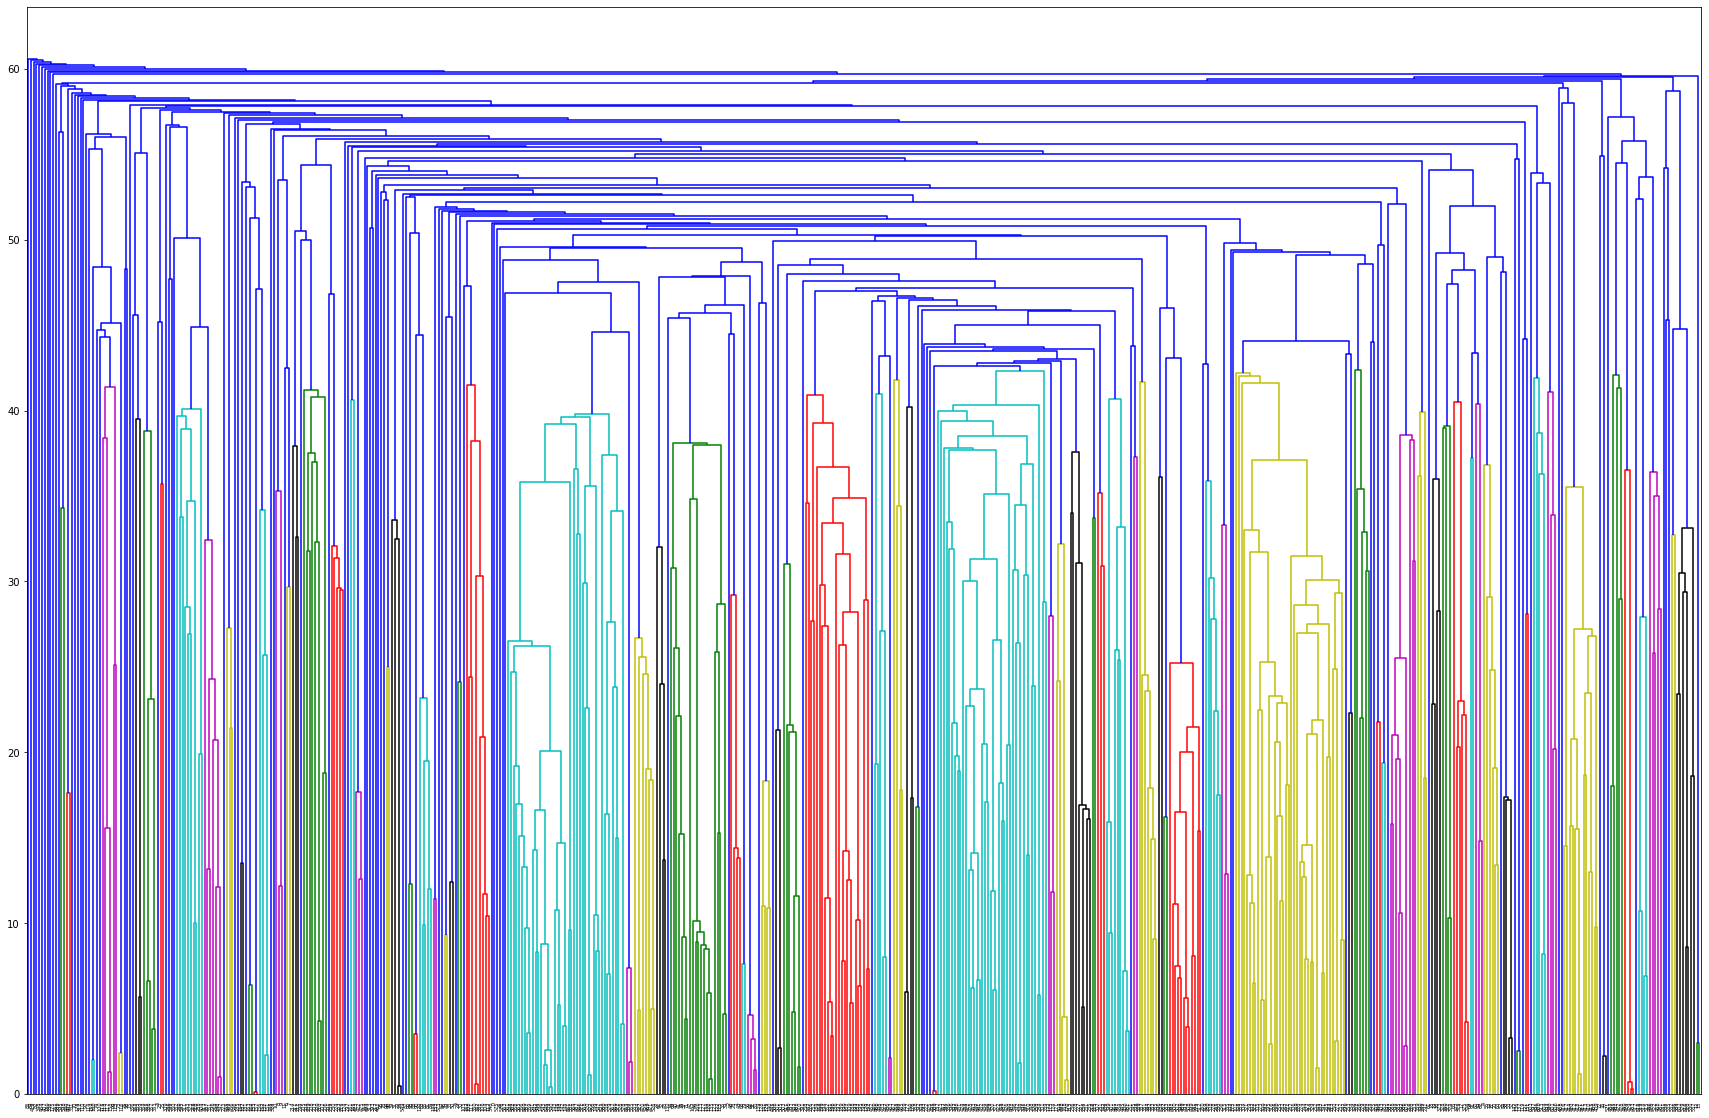

In [49]:
fig = plt.figure(figsize=(30, 20))
dn = dendrogram(z)


In [44]:
fig.savefig('March25.png')

Text(0.5, 0.98, 'March 25 Mobility\n Clustering of Baranggay \n DENDOGRAM \n SUPER-FINAL5-submit-revision2')

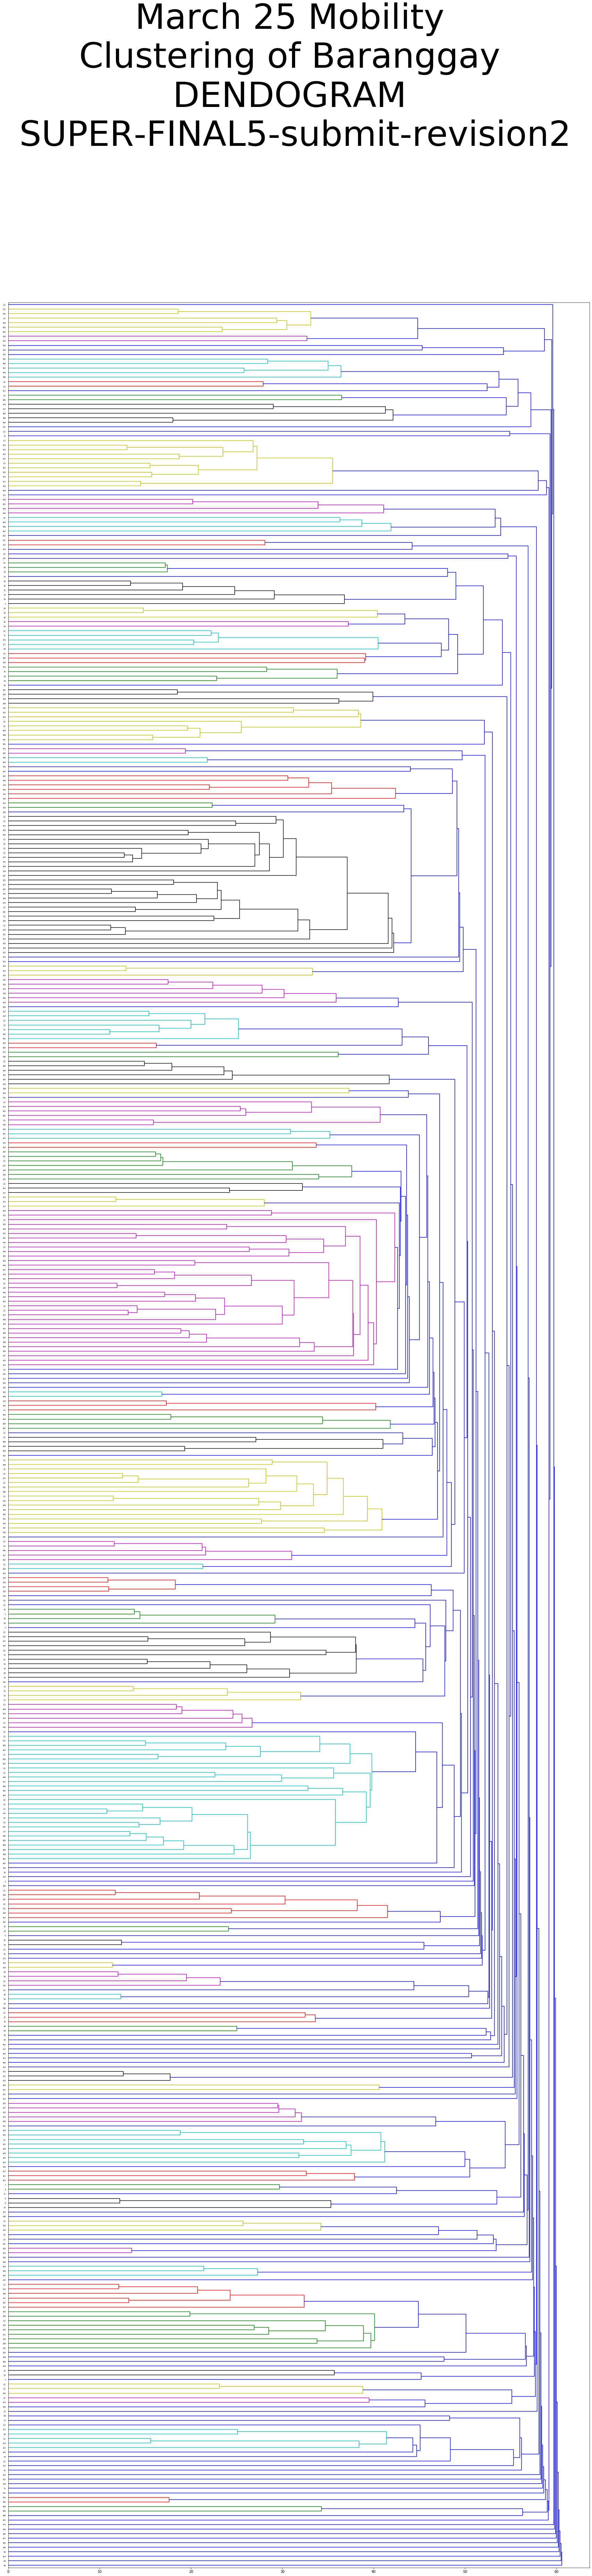

In [70]:
fig = plt.figure(figsize=(30, 120))
dn = dendrogram(z, truncate_mode='lastp', p=500, orientation='right')
fig.suptitle("March 25 Mobility\n Clustering of Baranggay \n DENDOGRAM \n SUPER-FINAL5-submit-revision2", fontsize=100)
# fig.set_xlabel(fontsize=50)


In [71]:
fig.savefig('landscape.png')

In [73]:
sorted_weights

,edge,weight
81996,"(155, 157)",0.327200
177718,"(495, 509)",0.307692
175796,"(479, 483)",0.256637
181643,"(539, 540)",0.256198
13102,"(22, 24)",0.252427
...,...,...
79393,"(149, 275)",0.000000
79392,"(149, 274)",0.000000
79391,"(149, 273)",0.000000
79390,"(149, 272)",0.000000
